In [6]:
import numpy as np
arrivals = np.array([8,12,10,15,9,13,11,14,7,16,10,12,9,15,11,13,14,8,12,10])
n = len(arrivals)
sum_x = arrivals.sum()
mean = arrivals.mean()
sumsq_dev = ((arrivals - mean)**2).sum()
pop_var = sumsq_dev / n
samp_var = sumsq_dev / (n-1)
samp_std = np.sqrt(samp_var)

print("n =", n)
print("Sum =", sum_x)
print("Mean =", mean)
print("Sum of squared deviations =", round(sumsq_dev,5))
print("Population variance =", round(pop_var,5))
print("Sample variance =", round(samp_var,5))
print("Sample std dev =", round(samp_std,6))


n = 20
Sum = 229
Mean = 11.45
Sum of squared deviations = 126.95
Population variance = 6.3475
Sample variance = 6.68158
Sample std dev = 2.584875


Simulated 30-day arrivals (rounded):
[10.37 15.56 13.59 12.39  8.4   8.4   7.52 14.8  12.41 13.37  7.19 15.73
 14.49  8.91  8.64  8.65  9.74 11.72 10.89  9.62 12.51  8.26  9.63 10.3
 11.1  14.07  8.8  11.63 12.33  7.42]


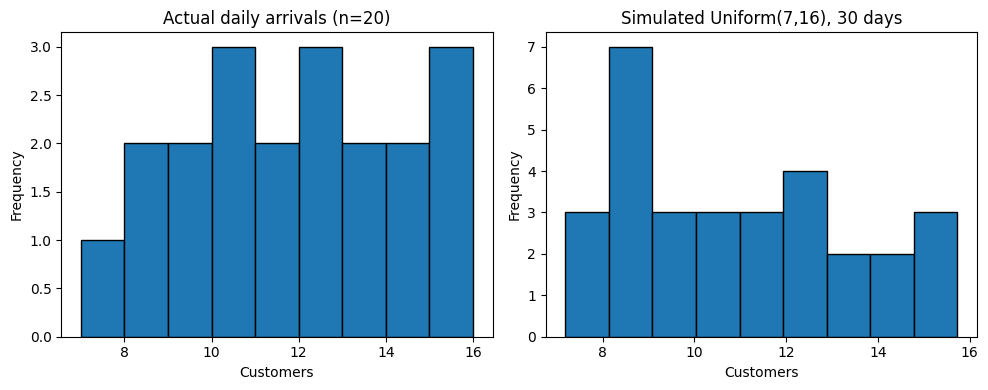

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # reproducible
min_val, max_val = 7, 16
sim_30 = np.random.uniform(low=min_val, high=max_val, size=30)

# Print simulated values (rounded)
print("Simulated 30-day arrivals (rounded):")
print(np.round(sim_30,2))

# Side-by-side histograms
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(arrivals, bins=9, edgecolor='black')
plt.title("Actual daily arrivals (n=20)")
plt.xlabel("Customers"); plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(sim_30, bins=9, edgecolor='black')
plt.title("Simulated Uniform(7,16), 30 days")
plt.xlabel("Customers"); plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
np.random.seed(42)
samples = np.random.uniform(low=7, high=16, size=100000)
est_prob = np.mean(samples > 15)
print("Monte Carlo estimate P(X>15) =", est_prob)
# also print theoretical
print("Theoretical P(X>15) = 1/9 =", 1/9)


Monte Carlo estimate P(X>15) = 0.10947
Theoretical P(X>15) = 1/9 = 0.1111111111111111


Hypothesized mean = 12
t-statistic = -0.951564289103872
p-value = 0.35326705355089905
Fail to reject H0: no significant difference.


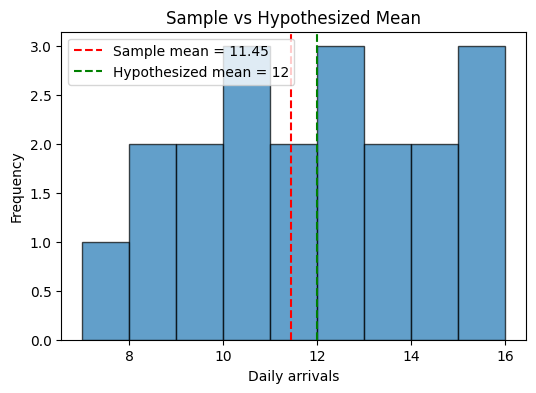

In [9]:
from scipy import stats
import matplotlib.pyplot as plt

hyp_mean = 12
t_stat, p_val = stats.ttest_1samp(arrivals, hyp_mean)

print("Hypothesized mean =", hyp_mean)
print("t-statistic =", t_stat)
print("p-value =", p_val)

# Decision at alpha = 0.05
alpha = 0.05
if p_val < alpha:
    print("Reject H0: significant difference.")
else:
    print("Fail to reject H0: no significant difference.")

# Visualization
plt.figure(figsize=(6,4))
plt.hist(arrivals, bins=9, edgecolor='black', alpha=0.7)
plt.axvline(arrivals.mean(), color='red', linestyle='--', label=f"Sample mean = {arrivals.mean():.2f}")
plt.axvline(hyp_mean, color='green', linestyle='--', label=f"Hypothesized mean = {hyp_mean}")
plt.legend()
plt.title("Sample vs Hypothesized Mean")
plt.xlabel("Daily arrivals"); plt.ylabel("Frequency")
plt.show()
